 # Major Project

# > Present  Analytics - India

In [79]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from scipy.integrate import odeint
from sklearn import metrics
data1 = pd.read_csv("covid_19_india(data1).csv")
data2 = pd.read_csv('covid_19_india(data2).csv') 
data3 = pd.read_csv('covid_19_india(data3).csv')
data4 = pd.read_csv('covid_19_india(data4).csv')
data5 = pd.read_csv('covid_19_india(data5).csv')
data6 = pd.read_csv('covid_19_india(data6).csv')

In [133]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3819 entries, 0 to 3818
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       3819 non-null   int64 
 1   Date                      3819 non-null   object
 2   Time                      3819 non-null   object
 3   State/UnionTerritory      3819 non-null   object
 4   ConfirmedIndianNational   3819 non-null   object
 5   ConfirmedForeignNational  3819 non-null   object
 6   Cured                     3819 non-null   int64 
 7   Deaths                    3819 non-null   int64 
 8   Confirmed                 3819 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 194.0+ KB


In [134]:
data1.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,1/2/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,3/2/2020,6:00 PM,Kerala,3,0,0,0,3


In [136]:
#eliminate unwanted columns 
data_cols = []

for cols in data1.columns:    
    data_cols.append(cols)
    
print(data_cols)

['Sno', 'Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed']


In [137]:
#dropping unawnted columns
data1.drop(columns=['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True)
print(data1) 

          Date              State/UnionTerritory  Cured  Deaths  Confirmed
0     30/01/20                            Kerala      0       0          1
1     31/01/20                            Kerala      0       0          1
2     1/2/2020                            Kerala      0       0          2
3     2/2/2020                            Kerala      0       0          3
4     3/2/2020                            Kerala      0       0          3
...        ...                               ...    ...     ...        ...
3814  6/7/2020                           Tripura   1202       1       1568
3815  6/7/2020                       Uttarakhand   2524      42       3124
3816  6/7/2020                     Uttar Pradesh  18761     785      27707
3817  27/03/21                       West Bengal  14711     757      22126
3818  6/7/2020  Cases being reassigned to states      0       0       4913

[3819 rows x 5 columns]


Allotted state - Rajasthan

In [138]:
RJ = data1["State/UnionTerritory"] == 'Rajasthan'
Rajasthan = data1.loc[RJ]

Rajasthan Analysis

In [139]:
Rajasthan.Date[0:124:30]

36      3/3/2020
581     2/4/2020
1535    2/5/2020
2549    1/6/2020
3630    1/7/2020
Name: Date, dtype: object

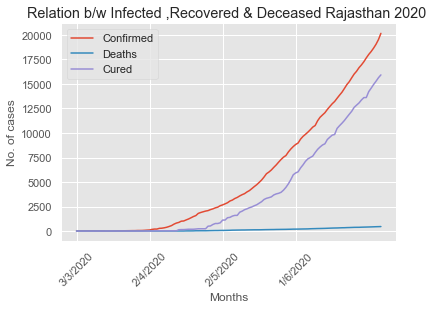

In [140]:
plt.style.use('ggplot')
plt.plot(Rajasthan.Date,Rajasthan.Confirmed,label="Confirmed")
plt.plot(Rajasthan.Date,Rajasthan.Deaths,label="Deaths")
plt.plot(Rajasthan.Date,Rajasthan.Cured,label="Cured")
plt.title("Relation b/w Infected ,Recovered & Deceased Rajasthan 2020 ")
plt.xlabel("Months")
plt.ylabel("No. of cases")
plt.xticks(Rajasthan.Date[0:107:30].tolist(),rotation=45)
plt.legend()
plt.show()

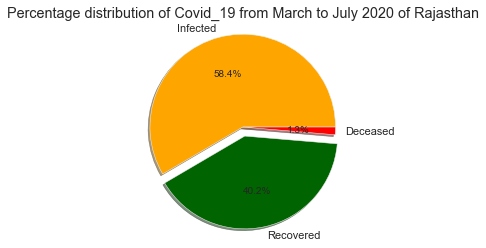

In [141]:
infected = sum(Rajasthan["Confirmed"])
deceased = sum(Rajasthan["Deaths"])
recovered = sum(Rajasthan["Cured"])
labels = ['Infected', 'Recovered', 'Deceased']
sizes = [infected, recovered, deceased]
colors = ['orange', 'darkgreen', 'red']
explode = (0, .1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution of Covid_19 from March to July 2020 of Rajasthan")
plt.axis('equal')
plt.show()

# > Heat-map

Correlation Heat-map for various parameters

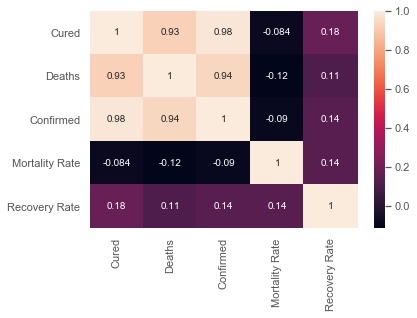

In [142]:
data1['Mortality Rate'] = (data1['Confirmed']/data1['Deaths']).round(2)
data1['Recovery Rate']  = (data1['Cured']/data1['Confirmed']).round(2)
sns.heatmap(data1.corr(),annot=True)

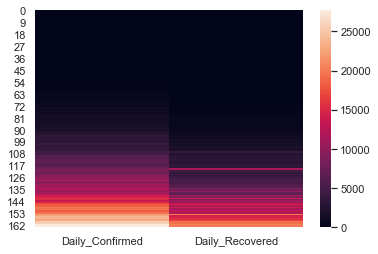

In [144]:
data2.corr()
sns.set()
data2.Daily_Confirmed.fillna(0)
data2.Total_Confirmed.fillna(0)
data2.Daily_Recovered.fillna(0)
data2.Total_Recovered.fillna(0)
data2.Daily_Deceased.fillna(0)
data2.Total_Deceased.fillna(0)
df = data2[['Daily_Confirmed','Daily_Recovered',]]
df.head()
sns.heatmap(df)

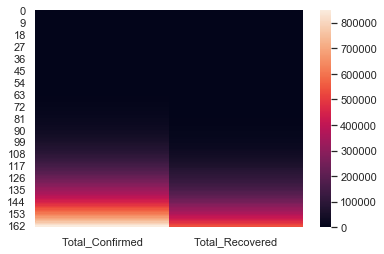

In [145]:
df1 = data2[['Total_Confirmed', 'Total_Recovered']]
sns.heatmap(df1)

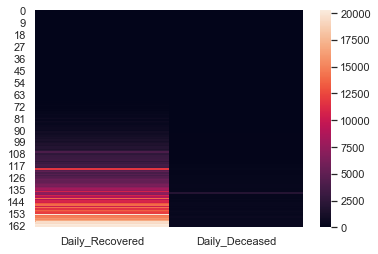

In [146]:
df2 = data2[['Daily_Recovered', 'Daily_Deceased']]
sns.heatmap(df2)

In [148]:
data3.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


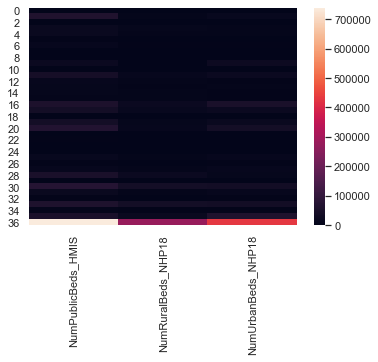

In [149]:
df3 = data3[['NumPublicBeds_HMIS', 'NumRuralBeds_NHP18', 'NumUrbanBeds_NHP18']]
data3.corr()
sns.heatmap(df3)

# > Model for Prediction

Confirmed cases and Recovered cases on any dates past 15th July 2020

In [60]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    360 non-null    object
 1   Status  360 non-null    object
 2   TT      360 non-null    int64 
 3   AN      360 non-null    int64 
 4   AP      360 non-null    int64 
 5   AR      360 non-null    int64 
 6   AS      360 non-null    int64 
 7   BR      360 non-null    int64 
 8   CH      360 non-null    int64 
 9   CT      360 non-null    int64 
 10  DN      360 non-null    int64 
 11  DD      360 non-null    int64 
 12  DL      360 non-null    int64 
 13  GA      360 non-null    int64 
 14  GJ      360 non-null    int64 
 15  HR      360 non-null    int64 
 16  HP      360 non-null    int64 
 17  JK      360 non-null    int64 
 18  JH      360 non-null    int64 
 19  KA      360 non-null    int64 
 20  KL      360 non-null    int64 
 21  LA      360 non-null    int64 
 22  LD      360 non-null    in

In [61]:
data4.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [62]:
data4['Status'].unique()
data4['Status'] = data4['Status'].replace("Confirmed", "0")
data4['Status'] = data4['Status'].replace("Recovered", "1")
data4['Status'] = data4['Status'].replace("Deceased", "2")
data4.drop(columns=['Date'],inplace=True)
x = data4[['TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD',
       'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP',
       'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG',
       'TR', 'UP', 'UT', 'WB', 'UN']] .values  
x[0:5]
y = data4['Status'].values
y[0:5]
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]  #standardization of data
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=2)
print ('Train set:', x_train.shape,  y_train.shape)
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh
yhat = neigh.predict(x_test)  
yhat[0:5]
score = neigh.score(x_test, y_test)
print("Model accuracy is {}".format(score.round(2))) #model accuracy score

Train set: (288, 39) (288,)
Model accuracy is 0.64


beta_1 = 5.882130, beta_2 = 0.461272


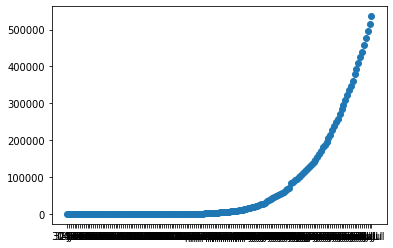

<Figure size 576x360 with 0 Axes>

In [80]:
plt.scatter(data5['Date'], data5['Total_Recovered'])
X = data5.Total_Confirmed 
y = data5.Daily_Confirmed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def sigmoid(X, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(- Beta_1*(X - Beta_2)))  #defining a exponential function
    return y

xdata = X / max(X)
ydata = y / max(y)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print('beta_1 = %f, beta_2 = %f' % (popt[0],popt[1]))
labelx = ['15 Jan','30Jan', '15 Feb', '1Mar', '17Mar', '3Apr', '18Apr', '12June', '27June','10July']
x = np.linspace(1, 165, 10)
x = x / max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, popt[0], popt[1])

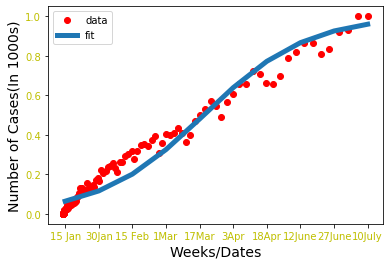

In [81]:
# Plotting the original data points
plt.plot(xdata, ydata, 'ro', label='data')
# Plotting the fitted prediction line
plt.plot(x, y, linewidth=5.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Number of Cases(In 1000s)', color='black', fontsize=14)
plt.xlabel('Weeks/Dates', color='black', fontsize=14)
plt.xticks(x, labelx, color = 'y')
plt.yticks(color = 'y')
plt.show()

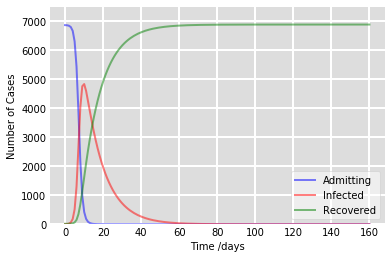

<Figure size 2880x2880 with 0 Axes>

In [93]:
N = 68900000 #total population of rajasthan
I0, R0 = 23748, 174869 #Active cases, Recovered cases as of July 11th(rajasthan)
S0 = N - (I0 + R0)
beta, gamma = 1.19, 1./10 
t = np.linspace(0, 160, 160) #Number of days

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

fig = plt.figure(facecolor='w')
plt.figure(figsize =(40,40))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/10000, 'b', alpha=0.5, lw=2, label='Admitting')
ax.plot(t, I/10000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/10000, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of Cases')
ax.set_ylim(0,7500)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# > Classifier for severity gauging

Build a classifier for severity gauging

In [63]:
data6.info()
data6.drop(columns=["Date","Time"],inplace=True)
data6.columns
data6.head(4) #Patient_Status col is the end vales need to patient
labelEncoder = LabelEncoder()
x[:,0] = labelEncoder.fit_transform(x[:,0])
x[:,2] = labelEncoder.fit_transform(x[:,2])
x[:,5] = labelEncoder.fit_transform(x[:,5])
x[:,6] = labelEncoder.fit_transform(x[:,6]) #converting string into numberic data to perform ML
x[:,7] = labelEncoder.fit_transform(x[:,7])
x[:,8] = labelEncoder.fit_transform(x[:,8])
x[:,9] = labelEncoder.fit_transform(x[:,9])
x1 = pd.DataFrame(x)
x1
x1[1] = x1[1].replace('-',0)
x1[3] = x1[3].replace('-',0) #replacing - with 0
x = x1[[0,1,2,3,4,5,6,7,8]] .values  
x[0:5]
y = x1[9].values
y=y.astype('int') #converting object into int for calculation
y[0:5]
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5] #Standardization of data
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)  #splitting data into train & test data
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)  #splitting data into train & test data
yhat = knn.predict(x_test)
yhat[0:5]
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat)) #accuracy score for test data & train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      3135 non-null   object
 1   Time                      3135 non-null   object
 2   State/UnionTerritory      3135 non-null   object
 3   ConfirmedIndianNational   3135 non-null   object
 4   Gender                    3135 non-null   object
 5   ConfirmedForeignNational  3135 non-null   object
 6   Age                       3135 non-null   int64 
 7   Serious symptoms          3135 non-null   object
 8   Less common symptoms      3135 non-null   object
 9   Most common symptoms      3135 non-null   object
 10  Severity                  3135 non-null   object
 11  Patient_Status            3135 non-null   object
dtypes: int64(1), object(11)
memory usage: 159.3+ KB
Train set: (288, 9) (288,)
Test set: (72, 9) (72,)
Train set: (288, 9) (288,)
Test s